In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *

N = 10

# Bases
CH = SpectralBase(N,"CH")
CD = SpectralBase(N,"CD")
DC = DirichletC(N)

# Space
x = CH.x
f = (x-1)*0.5

# Boundary conditions
bc = np.zeros(2)
bc[0] = -1

# Transform
fhatch = CH.forward_fft(f)
fhatcd = CD.forward_fft(f,bc=bc)



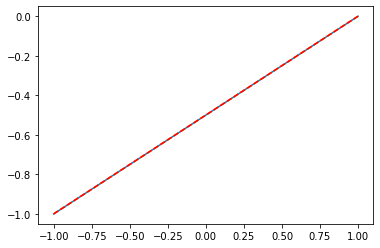

In [2]:
plt.plot(x,f)
plt.plot(x,CH.backward_fft(fhatch),"--")
plt.plot(x,CD.backward_fft(fhatcd,bc=bc),"r--")
plt.show()

## 2-Dimensional

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *

N = 60

# Bases
CH = SpectralBase(N,"CH")
CD = SpectralBase(N,"CD")
CN = SpectralBase(N+0,"CD")
DC = DirichletC(N)

# Space
x = CH.x
y = CD.x
xx,yy = np.meshgrid(x,y,indexing="ij")
f = np.sin(np.pi*xx )#+0.5*xx-0.5

# Boundary conditions
bc = np.zeros((2,N))
bc[0] = x
bchat = CD.forward_fft(bc.T).T

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, f,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

DC.forward_fft(bc.T)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [4]:
#print(bc)
fhat = CD.forward_fft(f,bc=bc[:,:])
#fhat = CD.forward_fft(f)
#print(fhat)
fhat = CD.forward_fft(fhat.T).T
fhat

array([[ 2.51317494e-17, -4.74863545e-01,  4.35174163e-17, ...,
        -2.49928182e-02,  6.07588037e-17, -8.33093939e-03],
       [ 5.59582709e-01,  4.66676242e-01,  5.40286753e-01, ...,
         2.45619075e-02,  1.92959555e-02,  8.18730250e-03],
       [ 7.97664708e-18, -4.58488940e-01,  4.47307731e-17, ...,
        -2.41309968e-02, -2.72436978e-17, -8.04366561e-03],
       ...,
       [-1.76201553e-17,  2.45619075e-02, -1.54583909e-17, ...,
         1.29273197e-03,  1.13388295e-18,  4.30910658e-04],
       [-5.62742528e-17, -1.63746050e-02, -5.01441566e-17, ...,
        -8.61821316e-04, -1.64922292e-18, -2.87273772e-04],
       [-1.30398024e-17,  8.18730250e-03, -1.13036575e-17, ...,
         4.30910658e-04, -9.11516481e-19,  1.43636886e-04]])

In [61]:
fcd = CD.backward_fft(fhat,bc=bchat[:,:])
fcd = CN.backward_fft(fcd.T,bc=None).T
fcd

array([[ 6.24500451e-17, -9.98582696e-01, -9.94334800e-01, ...,
         9.94334800e-01,  9.98582696e-01, -6.24500451e-17],
       [ 2.89659864e-31, -4.45257814e-03, -4.45257814e-03, ...,
        -4.45257814e-03, -4.45257814e-03, -2.89659864e-31],
       [ 1.54074396e-32, -1.77968105e-02, -1.77968105e-02, ...,
        -1.77968105e-02, -1.77968105e-02, -1.54074396e-32],
       ...,
       [-4.46815747e-32,  1.77968105e-02,  1.77968105e-02, ...,
         1.77968105e-02,  1.77968105e-02,  4.46815747e-32],
       [ 7.70371978e-34,  4.45257814e-03,  4.45257814e-03, ...,
         4.45257814e-03,  4.45257814e-03, -7.70371978e-34],
       [ 6.16297582e-33,  1.49278101e-17,  1.01486554e-16, ...,
        -1.18530079e-16, -8.43744417e-18,  6.16297582e-33]])

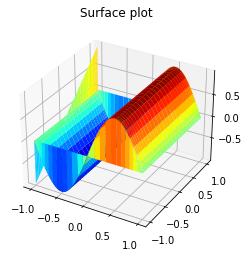

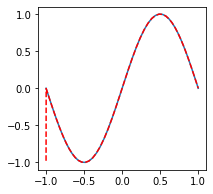

In [62]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, fcd,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

fig,ax = plt.subplots(figsize=(3,3))
ax.plot(x,f[:,4])
ax.plot(x,fcd[:,4],"r--")
plt.show()

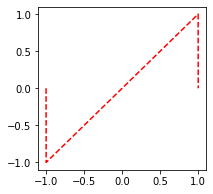

In [63]:

fig,ax = plt.subplots(figsize=(3,3))
ax.plot(x,fcd[0,:],"r--")
plt.show()